<a href="https://colab.research.google.com/github/olaidekashimawo/Chicago_Car_Crashes/blob/main/Copy_of_Chicago_Car_Crash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Final Project Submission


Please fill out: 

> * Student name: Olaide Kashimawo
> * Student pace: Self_paced
> * Scheduled project review date/time: 
> * Instructor name: Morgan Jones
> * Blog post URL:https://medium.com/@goldprint3/a-simple-understanding-of-confusion-matrix-fbf2fda8483





## Data
The datasets was from the City of Chicago. There were three datasets that we observed, "Traffic Crashes - Crashes", "Traffic Crashes - Vehicle", and "Traffic Crashes - People" was merged them into one database.

Column names and descriptions can be found here;

Traffic Crashes - Crashes: https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if

Traffic Crashes - Vehicle: https://data.cityofchicago.org/Transportation/Traffic-Crashes-Vehicles/68nd-jvt3

Traffic Crashes - People: https://data.cityofchicago.org/Transportation/Traffic-Crashes-People/u6pd-qa9d

It has 32 columms and 220458 columns after merging and dropping some duplicate or redundant columns

### Business Problem
This project builds a multi-classification model to identify primary cause of crashes and predict what causes accidents which can lead to an injury

In [ ]:

#!pip install scikit-learn==0.23.2

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, r2_score, recall_score, precision_score, roc_curve, roc_auc_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, plot_roc_curve 
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler

from sklearn.compose import ColumnTransformer

import six
import sys
sys.modules['sklearn.externals.six'] = six
from imblearn.over_sampling import SMOTE, ADASYN, SMOTENC

import folium 

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive


In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#pip install shap


In [ ]:
#import shap 
#shap.initjs()

## Importing the Data

In [ ]:
crash = pd.read_csv('/content/drive/MyDrive/data/Traffic_Crashes_-_Crashes.csv')

In [ ]:
people = pd.read_csv('/content/drive/MyDrive/data/Traffic_Crashes_-_People.csv')

In [ ]:
vehicles = pd.read_csv('/content/drive/MyDrive/data/Traffic_Crashes_-_Vehicles.csv')

## Data Cleaning

In [ ]:
crash.shape

(108357, 19)

In [ ]:
people.shape

(233681, 11)

In [ ]:
vehicles.shape

(220458, 72)

In [ ]:
crash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108357 entries, 0 to 108356
Data columns (total 49 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                108357 non-null  object 
 1   RD_NO                          108357 non-null  object 
 2   CRASH_DATE_EST_I               8365 non-null    object 
 3   CRASH_DATE                     108357 non-null  object 
 4   POSTED_SPEED_LIMIT             108357 non-null  int64  
 5   TRAFFIC_CONTROL_DEVICE         108357 non-null  object 
 6   DEVICE_CONDITION               108357 non-null  object 
 7   WEATHER_CONDITION              108357 non-null  object 
 8   LIGHTING_CONDITION             108357 non-null  object 
 9   FIRST_CRASH_TYPE               108357 non-null  object 
 10  TRAFFICWAY_TYPE                108357 non-null  object 
 11  LANE_CNT                       16 non-null      float64
 12  ALIGNMENT                     

In [ ]:
#dropping columns either not relevant, or duplicate.
crashes_drop = crash[['CRASH_DATE', 'RD_NO', 'INJURIES_FATAL',
                        'CRASH_DATE_EST_I', 'DATE_POLICE_NOTIFIED',
                        'STREET_NO',
                        'STREET_DIRECTION', 'STREET_NAME',
                        'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 
                        'DOORING_I', 'WORK_ZONE_I', 'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I',
                        'LANE_CNT','REPORT_TYPE', 'CRASH_MONTH','LATITUDE',
                        'LONGITUDE','LOCATION', 'CRASH_TYPE','SEC_CONTRIBUTORY_CAUSE',
                        'INJURIES_INCAPACITATING','INJURIES_NON_INCAPACITATING',
                        'INJURIES_REPORTED_NOT_EVIDENT','INJURIES_NO_INDICATION', 
                        'INJURIES_UNKNOWN','MOST_SEVERE_INJURY',
                        'NOT_RIGHT_OF_WAY_I','INTERSECTION_RELATED_I']]

In [ ]:
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233681 entries, 0 to 233680
Data columns (total 30 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   PERSON_ID              233681 non-null  object 
 1   PERSON_TYPE            233681 non-null  object 
 2   CRASH_RECORD_ID        233681 non-null  object 
 3   RD_NO                  233681 non-null  object 
 4   VEHICLE_ID             229039 non-null  float64
 5   CRASH_DATE             233681 non-null  object 
 6   SEAT_NO                45358 non-null   float64
 7   CITY                   166055 non-null  object 
 8   STATE                  169142 non-null  object 
 9   ZIPCODE                152371 non-null  object 
 10  SEX                    229484 non-null  object 
 11  AGE                    162875 non-null  float64
 12  DRIVERS_LICENSE_STATE  135507 non-null  object 
 13  DRIVERS_LICENSE_CLASS  106429 non-null  object 
 14  SAFETY_EQUIPMENT       233089 non-nu

In [ ]:
 #dropping columns either not relevant, or duplicate.
people_drop = people[['PERSON_ID','RD_NO', 'CRASH_DATE', 'CITY', 'STATE', 'ZIPCODE', 'DRIVERS_LICENSE_STATE', 
                      'HOSPITAL',  'EMS_RUN_NO',
                      'DRIVER_ACTION', 'PHYSICAL_CONDITION', 'PEDPEDAL_ACTION','EJECTION','INJURY_CLASSIFICATION',
                      'PEDPEDAL_VISIBILITY', 'PEDPEDAL_LOCATION', 'BAC_RESULT', 
                      'BAC_RESULT VALUE', 'CELL_PHONE_USE']]

In [ ]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220458 entries, 0 to 220457
Data columns (total 72 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   CRASH_UNIT_ID             220458 non-null  int64  
 1   CRASH_RECORD_ID           220458 non-null  object 
 2   RD_NO                     220458 non-null  object 
 3   CRASH_DATE                220458 non-null  object 
 4   UNIT_NO                   220458 non-null  int64  
 5   UNIT_TYPE                 220218 non-null  object 
 6   NUM_PASSENGERS            31095 non-null   float64
 7   VEHICLE_ID                215569 non-null  float64
 8   CMRC_VEH_I                4304 non-null    object 
 9   MAKE                      215569 non-null  object 
 10  MODEL                     215569 non-null  object 
 11  LIC_PLATE_STATE           193309 non-null  object 
 12  VEHICLE_YEAR              181094 non-null  float64
 13  VEHICLE_DEFECT            215569 non-null  o

In [ ]:
#dropping columns either not relevant, or duplicate.
vehicles_drop = vehicles[['RD_NO', 'CRASH_DATE', 'LIC_PLATE_STATE', 'AREA_00_I', 'AREA_01_I','UNIT_NO',
                                       'AREA_02_I', 'AREA_03_I','AREA_04_I','AREA_05_I','AREA_06_I','AREA_07_I',
                                       'AREA_08_I','AREA_09_I','AREA_10_I','AREA_11_I','AREA_12_I','AREA_99_I',
                                       'CMV_ID', 'USDOT_NO', 'CCMC_NO', 'ILCC_NO', 'COMMERCIAL_SRC', 'GVWR',
                                       'CARRIER_NAME', 'CARRIER_CITY', 'HAZMAT_PLACARDS_I','EXCEED_SPEED_LIMIT_I',
                                       'HAZMAT_NAME', 'UN_NO','HAZMAT_PRESENT_I', 'HAZMAT_REPORT_I', 
                                       'HAZMAT_REPORT_NO', 'MCS_REPORT_I', 'IDOT_PERMIT_NO',
                                       'WIDE_LOAD_I', 'TRAILER1_WIDTH', 'TRAILER2_WIDTH', 'TRAILER1_LENGTH', 
                                       'TRAILER2_LENGTH', 'TOTAL_VEHICLE_LENGTH', 'AXLE_CNT',
                                       'LOAD_TYPE', 'HAZMAT_OUT_OF_SERVICE_I', 'MCS_OUT_OF_SERVICE_I', 
                                       'HAZMAT_CLASS', 'MAKE', 'MODEL', 'VEHICLE_YEAR', 'VEHICLE_DEFECT', 
                                       'VEHICLE_CONFIG', 'CARGO_BODY_TYPE', 'TOWED_BY', 
                                       'TOWED_I', 'CARRIER_STATE',
                                       'FIRE_I', 'MCS_REPORT_NO','HAZMAT_VIO_CAUSE_CRASH_I',
                                       'MCS_VIO_CAUSE_CRASH_I', 'TOWED_TO',
                                       'CMRC_VEH_I','VEHICLE_ID', 'OCCUPANT_CNT', 'NUM_PASSENGERS',
                                       'TRAVEL_DIRECTION', 'MANEUVER',
                                       'VEHICLE_USE', 'CRASH_UNIT_ID']]

In [ ]:
#dropping columns either not relevant, or duplicate.
crash.drop(columns=crashes_drop, inplace=True)
vehicles.drop(columns=vehicles_drop, inplace=True)
people.drop(columns=people_drop, inplace=True)


### Merge Dataset

In [ ]:
#Merging Datasets on the Crash_Record_ID Column
merge = pd.merge(crash, vehicles, on='CRASH_RECORD_ID')
df_merge = pd.merge(merge, people, on='CRASH_RECORD_ID')
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 489268 entries, 0 to 489267
Data columns (total 32 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   CRASH_RECORD_ID          489268 non-null  object 
 1   POSTED_SPEED_LIMIT       489268 non-null  int64  
 2   TRAFFIC_CONTROL_DEVICE   489268 non-null  object 
 3   DEVICE_CONDITION         489268 non-null  object 
 4   WEATHER_CONDITION        489268 non-null  object 
 5   LIGHTING_CONDITION       489268 non-null  object 
 6   FIRST_CRASH_TYPE         489268 non-null  object 
 7   TRAFFICWAY_TYPE          489268 non-null  object 
 8   ALIGNMENT                489268 non-null  object 
 9   ROADWAY_SURFACE_COND     489268 non-null  object 
 10  ROAD_DEFECT              489268 non-null  object 
 11  HIT_AND_RUN_I            151099 non-null  object 
 12  DAMAGE                   489268 non-null  object 
 13  PRIM_CONTRIBUTORY_CAUSE  489268 non-null  object 
 14  BEAT

In [ ]:
df_merge.shape

(489268, 32)

In [ ]:
# previewing shape, data and info 
df_merge.head()


,CRASH_RECORD_ID,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,...,PERSON_TYPE,VEHICLE_ID,SEAT_NO,SEX,AGE,DRIVERS_LICENSE_CLASS,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED,EMS_AGENCY,DRIVER_VISION
0,5161efdc2c1e9a2b4258fdf2aa9e80842c24ecb809beca...,30,NO CONTROLS,NO CONTROLS,UNKNOWN,DARKNESS,PARKED MOTOR VEHICLE,FOUR WAY,STRAIGHT AND LEVEL,UNKNOWN,...,DRIVER,1192196.0,NaN,M,NaN,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,NaN,UNKNOWN
1,5161efdc2c1e9a2b4258fdf2aa9e80842c24ecb809beca...,30,NO CONTROLS,NO CONTROLS,UNKNOWN,DARKNESS,PARKED MOTOR VEHICLE,FOUR WAY,STRAIGHT AND LEVEL,UNKNOWN,...,DRIVER,1192196.0,NaN,M,NaN,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,NaN,UNKNOWN
2,c53b8a03d0579a96e405f12d3547fbe6efdac9e2ae3227...,30,NO CONTROLS,UNKNOWN,SNOW,UNKNOWN,PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,SNOW OR SLUSH,...,DRIVER,1192474.0,NaN,X,NaN,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,NaN,UNKNOWN
3,c53b8a03d0579a96e405f12d3547fbe6efdac9e2ae3227...,30,NO CONTROLS,UNKNOWN,SNOW,UNKNOWN,PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,SNOW OR SLUSH,...,DRIVER,1192474.0,NaN,X,NaN,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,NaN,UNKNOWN
4,185a472363e34e93586515ec860fe6222af49f29d59f40...,30,NO CONTROLS,NO CONTROLS,RAIN,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN BARRIER,STRAIGHT AND LEVEL,WET,...,DRIVER,1191880.0,NaN,F,30.0,D,SAFETY BELT USED,"DEPLOYED, COMBINATION",NaN,NOT OBSCURED


In [ ]:
# calculating nulls
nulls = df_merge.isna().sum()
nulls

CRASH_RECORD_ID                 0
POSTED_SPEED_LIMIT              0
TRAFFIC_CONTROL_DEVICE          0
DEVICE_CONDITION                0
WEATHER_CONDITION               0
LIGHTING_CONDITION              0
FIRST_CRASH_TYPE                0
TRAFFICWAY_TYPE                 0
ALIGNMENT                       0
ROADWAY_SURFACE_COND            0
ROAD_DEFECT                     0
HIT_AND_RUN_I              338169
DAMAGE                          0
PRIM_CONTRIBUTORY_CAUSE         0
BEAT_OF_OCCURRENCE              0
NUM_UNITS                       0
INJURIES_TOTAL                  0
CRASH_HOUR                      0
CRASH_DAY_OF_WEEK               0
UNIT_TYPE                     437
VEHICLE_TYPE                10997
FIRST_CONTACT_POINT         17032
PERSON_TYPE                     0
VEHICLE_ID                   9909
SEAT_NO                    393072
SEX                          8881
AGE                        147257
DRIVERS_LICENSE_CLASS      266596
SAFETY_EQUIPMENT             1358
AIRBAG_DEPLOYE

In [ ]:
#Dropping null values
df_merge.fillna(0, inplace=True)

In [ ]:
#df.reset_index(inplace=True)
df_merge.dropna(axis = 1, inplace =True)
#df.head()

In [ ]:
#I begin by converting the column names to lowercase for ease:
df = df_merge.rename(columns=str.lower)
df

,crash_record_id,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,...,person_type,vehicle_id,seat_no,sex,age,drivers_license_class,safety_equipment,airbag_deployed,ems_agency,driver_vision
0,5161efdc2c1e9a2b4258fdf2aa9e80842c24ecb809beca...,30,NO CONTROLS,NO CONTROLS,UNKNOWN,DARKNESS,PARKED MOTOR VEHICLE,FOUR WAY,STRAIGHT AND LEVEL,UNKNOWN,...,DRIVER,1192196.0,0.0,M,0.0,0,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,0,UNKNOWN
1,5161efdc2c1e9a2b4258fdf2aa9e80842c24ecb809beca...,30,NO CONTROLS,NO CONTROLS,UNKNOWN,DARKNESS,PARKED MOTOR VEHICLE,FOUR WAY,STRAIGHT AND LEVEL,UNKNOWN,...,DRIVER,1192196.0,0.0,M,0.0,0,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,0,UNKNOWN
2,c53b8a03d0579a96e405f12d3547fbe6efdac9e2ae3227...,30,NO CONTROLS,UNKNOWN,SNOW,UNKNOWN,PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,SNOW OR SLUSH,...,DRIVER,1192474.0,0.0,X,0.0,0,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,0,UNKNOWN
3,c53b8a03d0579a96e405f12d3547fbe6efdac9e2ae3227...,30,NO CONTROLS,UNKNOWN,SNOW,UNKNOWN,PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,SNOW OR SLUSH,...,DRIVER,1192474.0,0.0,X,0.0,0,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,0,UNKNOWN
4,185a472363e34e93586515ec860fe6222af49f29d59f40...,30,NO CONTROLS,NO CONTROLS,RAIN,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN BARRIER,STRAIGHT AND LEVEL,WET,...,DRIVER,1191880.0,0.0,F,30.0,D,SAFETY BELT USED,"DEPLOYED, COMBINATION",0,NOT OBSCURED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489263,0e671ca4c1c802a337a6dd0334c6cbcbdf58f09d17d8f4...,30,NO CONTROLS,NO CONTROLS,UNKNOWN,UNKNOWN,PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,UNKNOWN,...,DRIVER,1418939.0,0.0,X,0.0,0,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,0,UNKNOWN
489264,258df4dedebe0503d6d4a7eda1f5e7217fea3ba2a9ffc2...,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,RAIN,"DARKNESS, LIGHTED ROAD",ANGLE,FOUR WAY,STRAIGHT AND LEVEL,WET,...,DRIVER,1419030.0,0.0,F,0.0,0,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,0,UNKNOWN
489265,258df4dedebe0503d6d4a7eda1f5e7217fea3ba2a9ffc2...,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,RAIN,"DARKNESS, LIGHTED ROAD",ANGLE,FOUR WAY,STRAIGHT AND LEVEL,WET,...,DRIVER,1419034.0,0.0,M,46.0,D,SAFETY BELT USED,DID NOT DEPLOY,0,NOT OBSCURED
489266,258df4dedebe0503d6d4a7eda1f5e7217fea3ba2a9ffc2...,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,RAIN,"DARKNESS, LIGHTED ROAD",ANGLE,FOUR WAY,STRAIGHT AND LEVEL,WET,...,DRIVER,1419030.0,0.0,F,0.0,0,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,0,UNKNOWN


In [ ]:
df.drop(['num_units','vehicle_id', 'seat_no',], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 489268 entries, 0 to 489267
Data columns (total 29 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   crash_record_id          489268 non-null  object 
 1   posted_speed_limit       489268 non-null  int64  
 2   traffic_control_device   489268 non-null  object 
 3   device_condition         489268 non-null  object 
 4   weather_condition        489268 non-null  object 
 5   lighting_condition       489268 non-null  object 
 6   first_crash_type         489268 non-null  object 
 7   trafficway_type          489268 non-null  object 
 8   alignment                489268 non-null  object 
 9   roadway_surface_cond     489268 non-null  object 
 10  road_defect              489268 non-null  object 
 11  hit_and_run_i            489268 non-null  object 
 12  damage                   489268 non-null  object 
 13  prim_contributory_cause  489268 non-null  object 
 14  beat

In [ ]:
#df_merge['most_severe_injury'] = df_merge['MOST_SEVERE_INJURY']
#df_merge.most_severe_injury. value_counts()

In [ ]:
#Then examine:
print(df.shape)
df.info()

(489268, 29)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 489268 entries, 0 to 489267
Data columns (total 29 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   crash_record_id          489268 non-null  object 
 1   posted_speed_limit       489268 non-null  int64  
 2   traffic_control_device   489268 non-null  object 
 3   device_condition         489268 non-null  object 
 4   weather_condition        489268 non-null  object 
 5   lighting_condition       489268 non-null  object 
 6   first_crash_type         489268 non-null  object 
 7   trafficway_type          489268 non-null  object 
 8   alignment                489268 non-null  object 
 9   roadway_surface_cond     489268 non-null  object 
 10  road_defect              489268 non-null  object 
 11  hit_and_run_i            489268 non-null  object 
 12  damage                   489268 non-null  object 
 13  prim_contributory_cause  489268 non-null  obje

## Inspecting Values per Column

In [ ]:
for col in df.columns:
    print(df[col].value_counts())
    print("----------------------------------------")

09aa8d6e2906482df6717671a532324d3667b00920b363a65face81089921576c5175803211ef1fc902662b7cb7df5e7268ab8491eb4fb4444a888fac30c888a    153
645cdd6fd3ed2f043eefdc48230464a8ad66127691a2a2781240f5c7570ff5a87aaa6cf887bc1f76e93cfcb770359fb8136d59a40d8c18b62133fec286670279    144
094c7b57ebee71308c984ccc55f2029cbf0cb4d9f5573672345056620019338a227ba77eb3f251431e7c7eb50c75ca4b21e751d937f12de2e9a374653f98e781     74
4d63dbd45ec9130e3691e3116f042c5be5bada9dd88806b13778f5783ccffcba95db2c7425953ad298440249de85733038c22b40214c4d1744a489c1c0020432     72
3bf2c91ad5916d41e309d02c275e830786330578946c7918b2e5cbed4f742b1d1a9613136da2f916ddddcfaf61ebeb2e3f0afd51acc492fbcdd47de2adbb2230     66
                                                                                                                                   ... 
1735102fcf93b05d45b01f771898f261ca02772d67eba8bd494976e07b8967c0a9553ca836adf780634e2a5369b876e0e47e2e53c0f3fc798d0799cea2c386a6      1
2276bcec67ae3a559129095f8a8c70d6c04231bbbc598a93

## Binning and Cleaning Categorical columns


### Weather Conditions

In [ ]:
#merging the values  and printing the value counts after merge
df['weather_condition'] = df['weather_condition'].replace({'UNKNOWN':'UNKNOWN/OTHER','OTHER':'UNKNOWN/OTHER',
                                                     'FREEZING RAIN/DRIZZLE': 'SLEET/HAIL',
                                                     'BLOWING SNOW': 'SNOW',
                                                      'SEVERE CROSS WIND GATE': 'CLOUDY/OVERCAST',
                                                     'BLOWING SAND, SOIL, DIRT': 'UNKNOWN/OTHER'})
df['weather_condition'].value_counts()

CLEAR              383631
RAIN                41089
UNKNOWN/OTHER       28649
SNOW                18802
CLOUDY/OVERCAST     14235
SLEET/HAIL           2457
FOG/SMOKE/HAZE        405
Name: weather_condition, dtype: int64

In [ ]:
#df.most_severe_injury.value_counts()

In [ ]:
#most_severe_injury_mapping = {'NO INDICATION OF INJURY': 'NO INJURY',
                       #'NONINCAPACITATING INJURY': 'INJURY',
                       #'REPORTED, NOT EVIDENT': 'NO INJURY',
                       #'INCAPACITATING INJURY': 'INJURY',
                              # }

#df.most_severe_injury = df.most_severe_injury.map(most_severe_injury_mapping)
#df.most_severe_injury.value_counts()

### Prim_contributory_cause

In [ ]:
df.prim_contributory_cause.value_counts()

UNABLE TO DETERMINE                                                                 184602
FAILING TO YIELD RIGHT-OF-WAY                                                        62742
FOLLOWING TOO CLOSELY                                                                48566
IMPROPER OVERTAKING/PASSING                                                          26195
FAILING TO REDUCE SPEED TO AVOID CRASH                                               23343
NOT APPLICABLE                                                                       20116
IMPROPER TURNING/NO SIGNAL                                                           17958
IMPROPER LANE USAGE                                                                  16591
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                  15726
DISREGARDING TRAFFIC SIGNALS                                                         14787
IMPROPER BACKING                                                                     13690

In [ ]:
prim_contributory_cause_mapping = {
                                   'FAILING TO YIELD RIGHT-OF-WAY':'FAILING TO YIELD RIGHT-OF-WAY',
                                   'FOLLOWING TOO CLOSELY':'FOLLOWING TOO CLOSELY',
                                   'IMPROPER OVERTAKING/PASSING':'IMPROPER OVERTAKING/PASSING',
                                   'FAILING TO REDUCE SPEED TO AVOID CRASH':'FAILING TO REDUCE SPEED TO AVOID CRASH',
                                   'IMPROPER TURNING/NO SIGNAL':'IMPROPER TURNING/NO SIGNAL',
                                   'IMPROPER LANE USAGE':'IMPROPER LANE USAGE',
                                   'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE':'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE',
                                   'DISREGARDING TRAFFIC SIGNALS':'DISREGARDING TRAFFIC SIGNALS',
                                   'IMPROPER BACKING':'IMPROPER BACKING',                                                                   
                                   'OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER': 'UNDER THE INFLUENCE OF ALCOHOL/DRUGS',    
                                   'WEATHER':'OTHERS',                                                                             
                                   'DISREGARDING STOP SIGN':'DISREGARDING STOP SIGN',                                                             
                                   'DRIVING ON WRONG SIDE/WRONG WAY': 'DISREGARDING STOP SIGN',                                                    
                                   'DISTRACTION - FROM INSIDE VEHICLE':'DISTRACTION',                                                
                                   'PHYSICAL CONDITION OF DRIVER': 'OTHERS',                                                        
                                   'EQUIPMENT - VEHICLE CONDITION': 'OTHERS',                                                  
                                   'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)': 'OTHERS',                             
                                   'UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)': 'UNDER THE INFLUENCE OF ALCOHOL/DRUGS',              
                                   'DISTRACTION - FROM OUTSIDE VEHICLE': 'DISTRACTION',                                              
                                   'DISREGARDING OTHER TRAFFIC SIGNS': 'DISREGARDING OTHER TRAFFIC SIGNS',                                                   
                                   'EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST': 'ANIMALS',                                   
                                   'CELL PHONE USE OTHER THAN TEXTING': 'CELL PHONE USE OTHER THAN TEXTING',                                                   
                                   'DISREGARDING ROAD MARKINGS': 'DISREGARDING OTHER TRAFFIC SIGNS',                                                      
                                   'ROAD CONSTRUCTION/MAINTENANCE':  'OTHERS',                                                       
                                   'HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE)': 'UNDER THE INFLUENCE OF ALCOHOL/DRUGS',                                     
                                   'ROAD ENGINEERING/SURFACE/MARKING DEFECTS': 'OTHERS',                                           
                                   'TURNING RIGHT ON RED':   'OTHERS',                                                           
                                   'RELATED TO BUS STOP':  'OTHERS',                                                                  
                                   'ANIMAL': 'ANIMALS',                                                                         
                                   'DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.)':'DISTRACTION',      
                                   'DISREGARDING YIELD SIGN':'OTHERS'   
                                   }
df.prim_contributory_cause= df.prim_contributory_cause.map(prim_contributory_cause_mapping)
df.prim_contributory_cause.value_counts()

FAILING TO YIELD RIGHT-OF-WAY             62742
FOLLOWING TOO CLOSELY                     48566
IMPROPER OVERTAKING/PASSING               26195
FAILING TO REDUCE SPEED TO AVOID CRASH    23343
IMPROPER TURNING/NO SIGNAL                17958
OTHERS                                    16776
IMPROPER LANE USAGE                       16591
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE       15726
DISREGARDING TRAFFIC SIGNALS              14787
IMPROPER BACKING                          13690
DISREGARDING STOP SIGN                     9955
UNDER THE INFLUENCE OF ALCOHOL/DRUGS       9343
DISTRACTION                                5190
DISREGARDING OTHER TRAFFIC SIGNS           1823
ANIMALS                                     950
CELL PHONE USE OTHER THAN TEXTING           636
Name: prim_contributory_cause, dtype: int64

### Crash_hour

In [ ]:
df.crash_hour.value_counts()

15    40769
16    40161
17    37645
14    33029
18    30406
13    28504
12    28128
8     26357
11    23281
19    22463
9     20745
10    20682
7     20527
20    18690
21    16161
22    14673
23    13654
0     10677
1      9060
6      8855
2      7846
3      6057
5      5739
4      5159
Name: crash_hour, dtype: int64

In [ ]:
def get_time_of_day(crash_hour):
    if crash_hour >= 0 and crash_hour <= 6:
        return 'Early Morning'
    elif crash_hour > 6 and crash_hour <= 12:
        return 'Morning'
    elif crash_hour > 12 and crash_hour <= 18:
        return 'Afternoon'
    else:
        return 'Evening'
df['time_of_day'] = pd.x=df['crash_hour'].apply(lambda x: get_time_of_day(x))

### Posted Speed limit

In [ ]:
df.posted_speed_limit.value_counts()

30    371994
35     33131
25     29810
20     18758
15     12612
10      9266
40      6609
45      4024
5       1137
0        851
55       642
50       168
3         95
60        32
39        26
24        18
65        16
7         12
11         8
32         8
8          8
29         7
2          6
1          6
44         6
70         4
22         4
33         4
23         4
62         2
Name: posted_speed_limit, dtype: int64

In [ ]:
speed_bins = [0, 15, 25, 40, 75]
speed_labels = ['0-15', '16-25', '26-40', '40+']
df['speed_limit'] = pd.cut(df['posted_speed_limit'], bins=speed_bins, labels=speed_labels)

### Age

In [ ]:
age_bins = [0, 15, 24, 35, 55, 100]
age_labels = ['15 & Under', '16-24', '25-35', '36-55', '56+']
df['age'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

### Road Surface

In [ ]:
df.roadway_surface_cond.value_counts()

DRY                352331
WET                 65850
UNKNOWN             45953
SNOW OR SLUSH       19820
ICE                  3866
OTHER                1388
SAND, MUD, DIRT        60
Name: roadway_surface_cond, dtype: int64

In [ ]:
roadway_surface_cond_mapping = {'DRY': 'ROAD_SURFACE',
                       'WET': 'ROAD_SURFACE',
                       'UNKNOWN ': 'UNKNOWN',
                       'SNOW OR SLUSH': 'ROAD_SURFACE',
                       'ICE': 'ROAD_SURFACE',
                       'OTHER': 'UNKNOWN',
                       'SAND, MUD, DIRT': 'UNKNOWN'
                               }

df.roadway_surface_cond = df.roadway_surface_cond.map(roadway_surface_cond_mapping)
df.roadway_surface_cond.value_counts()

ROAD_SURFACE    441867
UNKNOWN           1448
Name: roadway_surface_cond, dtype: int64

### First Crash type

In [ ]:
#Previewing:
df.first_crash_type.value_counts()

REAR END                        125988
TURNING                          87111
SIDESWIPE SAME DIRECTION         82368
PARKED MOTOR VEHICLE             68426
ANGLE                            68251
PEDESTRIAN                       11408
REAR TO FRONT                     8209
SIDESWIPE OPPOSITE DIRECTION      8043
FIXED OBJECT                      7843
PEDALCYCLIST                      7320
HEAD ON                           5422
REAR TO SIDE                      4613
OTHER OBJECT                      1947
REAR TO REAR                      1582
OTHER NONCOLLISION                 493
ANIMAL                             119
OVERTURNED                         113
TRAIN                               12
Name: first_crash_type, dtype: int64

In [ ]:
first_crash_mapping = {'PEDESTRIAN': 'PED/CYCLIST',
                       'PEDALCYCLIST': 'PED/CYCLIST',
                       'FIXED OBJECT': 'PARKED/FIXED',
                       'PARKED MOTOR VEHICLE': 'PARKED/FIXED',
                       'OTHER OBJECT': 'OTHER',
                       'TURNING': 'TURNING-ANGLE',
                       'REAR END': 'REAR END',
                       'ANGLE': 'TURNING-ANGLE',
                       'SIDESWIPE SAME DIRECTION': 'SIDESWIPE', 
                       'ANIMAL' : 'OTHER', 
                       'SIDESWIPE OPPOSITE DIRECTION ': 'SIDESWIPE',
                       'REAR TO FRONT' : 'OTHER',
                       'OTHER NONCOLLISION': 'OTHER',
                       'HEAD ON': 'OTHER',
                       'REAR TO SIDE': 'OTHER',
                       'REAR TO REAR': 'OTHER',
                       'OVERTURNED' : 'OTHER',
                       'TRAIN' : 'OTHER'}

df.first_crash_type = df.first_crash_type.map(first_crash_mapping)
df.first_crash_type.value_counts()

TURNING-ANGLE    155362
REAR END         125988
SIDESWIPE         82368
PARKED/FIXED      76269
OTHER             22510
PED/CYCLIST       18728
Name: first_crash_type, dtype: int64

### Airbag_deployed

In [ ]:
df.airbag_deployed.value_counts()

DID NOT DEPLOY                            193723
NOT APPLICABLE                            140272
DEPLOYMENT UNKNOWN                        104526
DEPLOYED, COMBINATION                      17755
DEPLOYED, FRONT                            17594
0                                           9597
DEPLOYED, SIDE                              5475
DEPLOYED OTHER (KNEE, AIR, BELT, ETC.)       326
Name: airbag_deployed, dtype: int64

In [ ]:
airbagdeploy_map = {'NOT APPLICABLE': 'NOT APPLICABLE/UNKNOWN',
                    'DID NOT DEPLOY': 'DID NOT DEPLOY',
                    'DEPLOYMENT UNKNOWN': 'NOT APPLICABLE/UNKNOWN',
                    'DEPLOYED, COMBINATION': 'DEPLOYED',
                    'DEPLOYED, SIDE': 'DEPLOYED',
                    'DEPLOYED, FRONT': 'DEPLOYED',
                    'DEPLOYED OTHER (KNEE, AIR, BELT, ETC.)': 'DEPLOYED'}

df.airbag_deployed = df.airbag_deployed.map(airbagdeploy_map)
df.airbag_deployed.value_counts()

NOT APPLICABLE/UNKNOWN    244798
DID NOT DEPLOY            193723
DEPLOYED                   41150
Name: airbag_deployed, dtype: int64

### Trafficway Type

In [ ]:
#Previewing:
df.trafficway_type.value_counts()

NOT DIVIDED                        211639
DIVIDED - W/MEDIAN (NOT RAISED)     71795
FOUR WAY                            62115
ONE-WAY                             47314
DIVIDED - W/MEDIAN BARRIER          29212
PARKING LOT                         22647
T-INTERSECTION                      11399
OTHER                               10825
ALLEY                                5361
UNKNOWN                              4533
CENTER TURN LANE                     2967
UNKNOWN INTERSECTION TYPE            2540
RAMP                                 1310
FIVE POINT, OR MORE                  1197
Y-INTERSECTION                       1127
TRAFFIC ROUTE                        1099
DRIVEWAY                              949
NOT REPORTED                          836
L-INTERSECTION                        209
ROUNDABOUT                            194
Name: trafficway_type, dtype: int64

In [ ]:
trafficway_mapping = {'NOT DIVIDED': 'NOT DIVIDED',
                      'FOUR WAY': 'FOUR WAY',
                      'DIVIDED - W/MEDIAN (NOT RAISED)': 'DIVIDED',
                      'ONE-WAY': 'ONE-WAY',
                      'PARKING LOT': 'PARKING LOT',
                      'DIVIDED - W/MEDIAN BARRIER': 'DIVIDED',
                      'ALLEY': 'DRIVEWAY-OTHER',
                      'T-INTERSECTION': 'DRIVEWAY-OTHER',
                      'OTHER': 'DRIVEWAY-OTHER',
                      'DRIVEWAY' : 'DRIVEWAY-OTHER',
                      'Y-INTERSECTION': 'DRIVEWAY-OTHER',
                      'FIVE POINT, OR MORE' : 'DRIVEWAY-OTHER',
                      'UNKNOWN': 'UNKNOWN',
                      'CENTER TURN LANE': 'DRIVEWAY-OTHER',
                      'UNKNOWN INTERSECTION TYPE': 'UNKNOWN',
                      'RAMP' : 'DRIVEWAY-OTHER',
                      'TRAFFIC ROUTE' : 'DRIVEWAY-OTHER',
                      'L-INTERSECTION' : 'DRIVEWAY-OTHER',
                      'ROUNDABOUT' : 'FOUR WAY',
                      'NOT REPORTED': 'UNKNOWN'}

df.trafficway_type = df.trafficway_type.map(trafficway_mapping)
df.trafficway_type.value_counts()

NOT DIVIDED       211639
DIVIDED           101007
FOUR WAY           62309
ONE-WAY            47314
DRIVEWAY-OTHER     36443
PARKING LOT        22647
UNKNOWN             7909
Name: trafficway_type, dtype: int64

### Road_defect

In [ ]:
#Previewing:
df.road_defect.value_counts()

NO DEFECTS           382537
UNKNOWN              100431
OTHER                  2214
WORN SURFACE           2074
RUT, HOLES             1333
SHOULDER DEFECT         488
DEBRIS ON ROADWAY       191
Name: road_defect, dtype: int64

In [ ]:
roaddefect_map = {'NO DEFECTS': 'NO DEFECTS',
                  'UNKNOWN': 'UNKNOWN-OTHER',
                  'OTHER': 'UNKNOWN-OTHER',
                  'RUT, HOLES' : 'UNKNOWN-OTHER',
                  'WORN SURFACE' : 'UNKNOWN-OTHER',
                  'DEBRIS ON ROADWAY' : 'UNKNOWN-OTHER',
                  'SHOULDER DEFECT': 'UNKNOWN-OTHER'}

df.road_defect = df.road_defect.map(roaddefect_map)
df.road_defect.value_counts()

NO DEFECTS       382537
UNKNOWN-OTHER    106731
Name: road_defect, dtype: int64

### Vehicle Type

In [ ]:
#Previewing:
df.vehicle_type.value_counts()

PASSENGER                                 299624
SPORT UTILITY VEHICLE (SUV)                77244
UNKNOWN/NA                                 34179
VAN/MINI-VAN                               21205
PICKUP                                     16940
0                                          10997
TRUCK - SINGLE UNIT                         7788
OTHER                                       5951
BUS OVER 15 PASS.                           5844
TRACTOR W/ SEMI-TRAILER                     3866
BUS UP TO 15 PASS.                          2098
MOTORCYCLE (OVER 150CC)                     1115
SINGLE UNIT TRUCK WITH TRAILER               972
TRACTOR W/O SEMI-TRAILER                     555
OTHER VEHICLE WITH TRAILER                   512
MOPED OR MOTORIZED BICYCLE                   225
ALL-TERRAIN VEHICLE (ATV)                     52
AUTOCYCLE                                     40
3-WHEELED MOTORCYCLE (2 REAR WHEELS)          32
FARM EQUIPMENT                                19
RECREATIONAL OFF-HIG

In [ ]:
vehicletype_map = {'PASSENGER': 'PASSENGER',
               'UNKNOWN/NA': 'UNKNOWN/NA',
               'SPORT UTILITY VEHICLE (SUV)': 'SUV/VAN/PICKUP',
               'VAN/MINI-VAN': 'SUV/VAN/PICKUP',
               'PICKUP': 'SUV/VAN/PICKUP',
               'TRUCK - SINGLE UNIT': 'BUS/TRUCK/TRAILER',
               'OTHER': 'OTHER',
               'BUS OVER 15 PASS.': 'BUS/TRUCK/TRAILER',
               'TRACTOR W/ SEMI-TRAILER': 'BUS/TRUCK/TRAILER',
               'BUS UP TO 15 PASS.': 'BUS/TRUCK/TRAILER',
               'SINGLE UNIT TRUCK WITH TRAILER': 'BUS/TRUCK/TRAILER',
               'MOTORCYCLE (OVER 150CC)': 'OTHER',
               'OTHER VEHICLE WITH TRAILER': 'OTHER',
               'TRACTOR W/O SEMI-TRAILER' : 'OTHER',
               'MOPED OR MOTORIZED BICYCLE' : 'OTHER',
               'ALL-TERRAIN VEHICLE (ATV)' : 'OTHER',
               'FARM EQUIPMENT' : 'OTHER',
               '3-WHEELED MOTORCYCLE (2 REAR WHEELS)' : 'OTHER',
               'RECREATIONAL OFF-HIGHWAY VEHICLE (ROV)' : 'OTHER'}

df.vehicle_type = df.vehicle_type.map(vehicletype_map)
df.vehicle_type.value_counts()

PASSENGER            299624
SUV/VAN/PICKUP       115389
UNKNOWN/NA            34179
BUS/TRUCK/TRAILER     20568
OTHER                  8470
Name: vehicle_type, dtype: int64

### Safety Equipment

In [ ]:
#Previewing:
df.safety_equipment.value_counts()

USAGE UNKNOWN                                 249685
SAFETY BELT USED                              210885
NONE PRESENT                                   15789
HELMET NOT USED                                 2905
SAFETY BELT NOT USED                            2366
CHILD RESTRAINT - FORWARD FACING                1835
0                                               1358
BICYCLE HELMET (PEDACYCLIST INVOLVED ONLY)      1268
CHILD RESTRAINT - TYPE UNKNOWN                   898
CHILD RESTRAINT - REAR FACING                    757
BOOSTER SEAT                                     519
DOT COMPLIANT MOTORCYCLE HELMET                  507
CHILD RESTRAINT NOT USED                         150
SHOULD/LAP BELT USED IMPROPERLY                  114
NOT DOT COMPLIANT MOTORCYCLE HELMET               96
WHEELCHAIR                                        68
CHILD RESTRAINT USED IMPROPERLY                   23
HELMET USED                                       22
STRETCHER                                     

In [ ]:
safetyequipment_map = {'NONE PRESENT': 'NONE PRESENT/UNUSED',
                   'HELMET NOT USED': 'NONE PRESENT/UNUSED',
                   'USAGE UNKNOWN': 'USAGE UNKNOWN',
                   'BICYCLE HELMET (PEDACYCLIST INVOLVED ONLY)': 'SAFETY EQUIPMENT USED',
                   'SAFETY BELT USED': 'SAFETY EQUIPMENT USED',
                   'SAFETY BELT NOT USED': 'NONE PRESENT/UNUSED',
                   'WHEELCHAIR' : 'USAGE UNKNOWN',
                   'BOOSTER SEAT' : 'SAFETY EQUIPMENT USED',
                   'STRETCHER' : 'USAGE UNKNOWN', 
                   'HELMET USED' : 'SAFETY EQUIPMENT USED',
                   'CHILD RESTRAINT USED' : 'SAFETY EQUIPMENT USED',
                   'CHILD RESTRAINT - FORWARD FACING': 'SAFETY EQUIPMENT USED',
                   'CHILD RESTRAINT - REAR FACING': 'SAFETY EQUIPMENT USED',
                   'CHILD RESTRAINT - TYPE UNKNOWN': 'SAFETY EQUIPMENT USED',
                   'DOT COMPLIANT MOTORCYCLE HELMET ': 'SAFETY EQUIPMENT USED',
                   'NOT DOT COMPLIANT MOTORCYCLE HELMET' : 'SAFETY EQUIPMENT USED',
                   'SHOULD/LAP BELT USED IMPROPERLY': 'NONE PRESENT/UNUSED',
                   'CHILD RESTRAINT NOT USED' : 'NONE PRESENT/UNUSED',
                   'CHILD RESTRAINT USED IMPROPERLY' : 'NONE PRESENT/UNUSED'}

df.safety_equipment = df.safety_equipment.map(safetyequipment_map)
df.safety_equipment.value_counts()

USAGE UNKNOWN            249769
SAFETY EQUIPMENT USED    216287
NONE PRESENT/UNUSED       21347
Name: safety_equipment, dtype: int64

### Traffic Control Device

In [ ]:
#Previewing:
df.traffic_control_device.value_counts()

NO CONTROLS                 244231
TRAFFIC SIGNAL              161670
STOP SIGN/FLASHER            54542
UNKNOWN                      20904
OTHER                         3852
YIELD                          803
OTHER REG. SIGN                582
PEDESTRIAN CROSSING SIGN       531
SCHOOL ZONE                    384
DELINEATORS                    384
RAILROAD CROSSING GATE         378
FLASHING CONTROL SIGNAL        313
OTHER WARNING SIGN             227
POLICE/FLAGMAN                 209
OTHER RAILROAD CROSSING        104
RR CROSSING SIGN               102
NO PASSING                      44
BICYCLE CROSSING SIGN            8
Name: traffic_control_device, dtype: int64

In [ ]:
#Mapping out:
traffic_control_mapping = {'NO CONTROLS': 'NO CONTROLS',
                    'TRAFFIC SIGNAL': 'SIGNAL/SIGN',
                    'STOP SIGN/FLASHER': 'SIGNAL/SIGN',
                    'UNKNOWN': 'NO CONTROLS',
                    'YIELD': 'NO CONTROLS',
                    'SCHOOL ZONE' : 'NO CONTROLS',
                    'PEDESTRIAN CROSSING SIGN' : 'SIGNAL/SIGN',
                    'FLASHING CONTROL SIGNAL' : 'SIGNAL/SIGN',
                    'OTHER REG. SIGN' :'SIGNAL/SIGN',
                    'RAILROAD CROSSING GATE' : 'NO CONTROLS',
                    'BICYCLE CROSSING SIGN'  : 'NO CONTROLS',
                    'OTHER WARNING SIGN' : 'NSIGNAL/SIGN',
                    'DELINEATORS' : 'SIGNAL/SIGN',
                    'RR CROSSING SIGN' : 'SIGNAL/SIGN',
                    'POLICE/FLAGMAN' : 'SIGNAL/SIGN',
                    'OTHER RAILROAD CROSSING' : 'NO CONTROLS',
                    'NO PASSING' : 'SIGNAL/SIGN'}

df.traffic_control_device = df.traffic_control_device.map(traffic_control_mapping)
df.traffic_control_device.value_counts()

NO CONTROLS     266812
SIGNAL/SIGN     218377
NSIGNAL/SIGN       227
Name: traffic_control_device, dtype: int64

### Road Defect

In [ ]:
#Previewing:
df.road_defect.value_counts()

NO DEFECTS       382537
UNKNOWN-OTHER    106731
Name: road_defect, dtype: int64

In [ ]:
df.dtypes

crash_record_id              object
posted_speed_limit            int64
traffic_control_device       object
device_condition             object
weather_condition            object
lighting_condition           object
first_crash_type             object
trafficway_type              object
alignment                    object
roadway_surface_cond         object
road_defect                  object
hit_and_run_i                object
damage                       object
prim_contributory_cause      object
beat_of_occurrence            int64
injuries_total              float64
crash_hour                    int64
crash_day_of_week             int64
unit_type                    object
vehicle_type                 object
first_contact_point          object
person_type                  object
sex                          object
age                        category
drivers_license_class        object
safety_equipment             object
airbag_deployed              object
ems_agency                  

In [ ]:
#These columns have been binned, so I will drop the originals
#drop = ['posted_speed_limit','person_type','person_id','num_units','injuries_fatal','unit_no','vehicle_id','seat_no','crash_hour','sec_contributory_cause','crash_record_id','ejection','age','injury_classification','beat_of_occurrence']
#df = df.drop(columns=drop)


### Identifying target variable
Target Variable. 

In [ ]:
# creating classes: 0 = not injured, 1 = injured
df['injuries_total'] = df['injuries_total'].map(lambda x: 1 if x > 0 else 0)
# renaming column 
df.rename(columns = {'injuries_total':'Injured'}, inplace = True) 
# reviewing classification 
df.Injured.value_counts()


0    390483
1     98785
Name: Injured, dtype: int64

### Feature Engineering

Below we are feature engineering relevant columns for the modeling process.

* Weather & lighting
* Road condition
* Crash type and damage
* People & Vehicle count in crash
* Saftey equipment deployed
* time of day
* Primary contributory cause
* Hit and Run

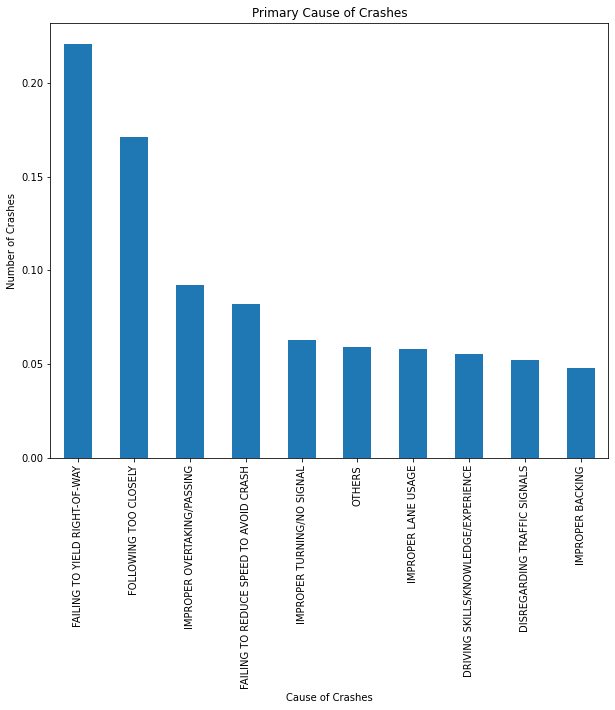

In [ ]:
#bar plot of Primary contributory cause
plt.figure(figsize=(15,15))
df['prim_contributory_cause'].value_counts(normalize = True).head(10).plot(kind = 'bar', figsize = (10,8))
plt.title('Primary Cause of Crashes')
plt.xlabel('Cause of Crashes')
plt.ylabel('Number of Crashes')
plt.show()

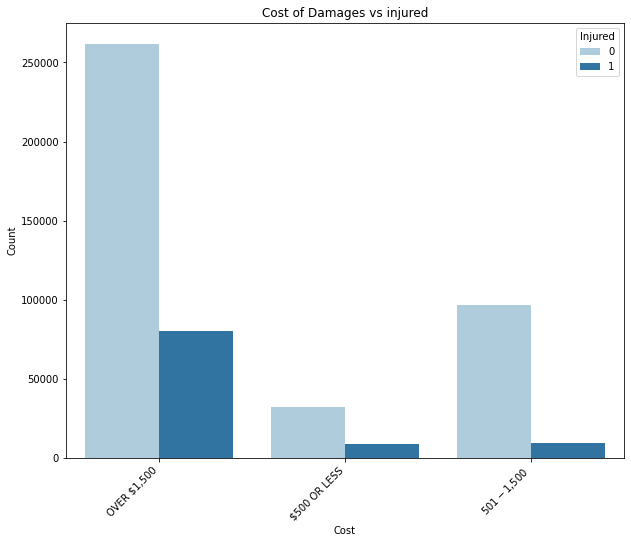

In [ ]:
# plot of DAMAGE
plt.figure(figsize=(10,8))
sns.countplot(x='damage', data=df, hue="Injured", palette= "Paired")
plt.title('Cost of Damages vs injured')
plt.xlabel('Cost')
plt.ylabel('Count')
plt.xticks(
    rotation=45, 
    horizontalalignment='right')
plt.show()

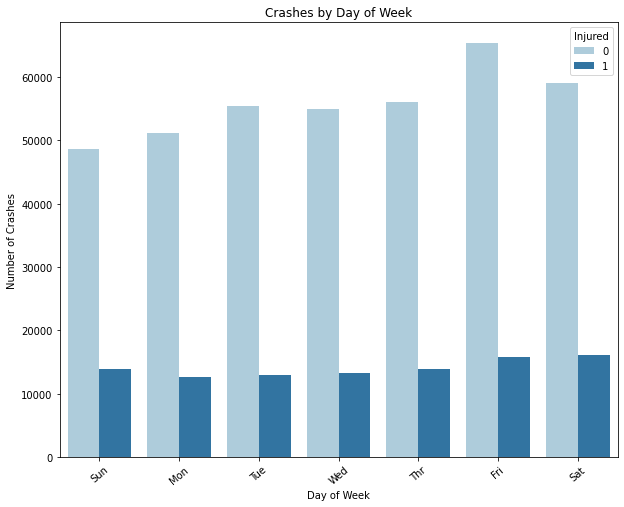

In [ ]:
#counterplot of CRASH_DAY_OF_WEEK
plt.figure(figsize=(10,8))
sns.countplot(x= "crash_day_of_week" , data=df, 
              hue="Injured", palette= "Paired")
plt.title('Crashes by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Crashes')
plt.xticks(np.arange(7), ('Sun','Mon','Tue','Wed','Thr','Fri','Sat'), 
           rotation=40)
plt.show()

*  Most accidents occurred on weekend mainly(on weekends)

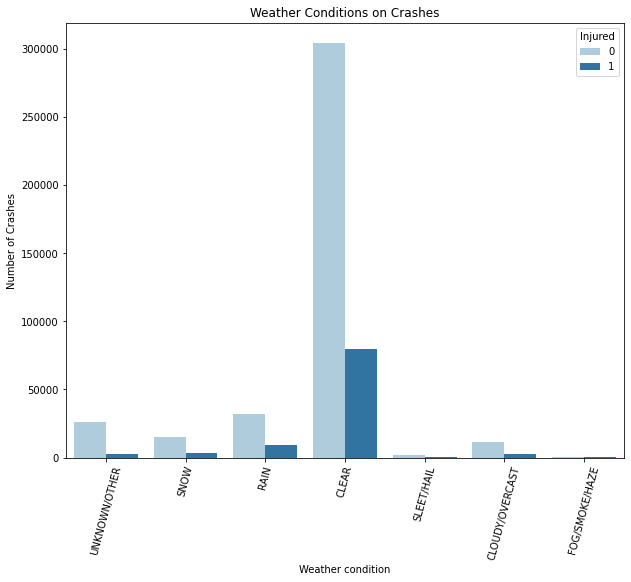

In [ ]:
#bar plot of WEATHER_CONDITION
plt.figure(figsize=(10,8))
sns.countplot(x= "weather_condition" , data=df, 
              hue="Injured", palette= "Paired")
plt.title('Weather Conditions on Crashes')
plt.xlabel('Weather condition')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=75)
plt.show()

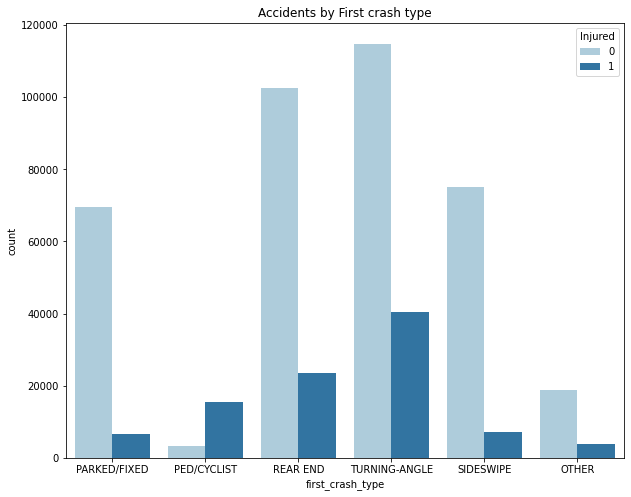

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Accidents by First crash type')
plt.xlabel('First crash type')
plt.ylabel('Number of Accidents')
sns.countplot(x = "first_crash_type", hue = "Injured", data = df, palette = "Paired")

In [ ]:
df['damage'] = df['damage'].astype('str')
df['Injured'] = df['Injured'].astype('str')
df['crash_day_of_week']= df['crash_day_of_week'].astype('str') 
df['beat_of_occurrence'] = df['beat_of_occurrence'].astype('str')




In [ ]:
#sns.set(rc={'figure.figsize':(20, 20)})
#sns.heatmap(df.corr().abs(),annot=True);

In [ ]:
df.drop(['crash_hour','age','crash_record_id','posted_speed_limit','first_contact_point',
 'person_type','alignment','speed_limit','damage','beat_of_occurrence','time_of_day','vehicle_type','ems_agency'], axis=1, inplace=True)


## Functions for Modeling

In [ ]:
def evaluate_classification(model, X_train_tf, X_test_tf, y_train, y_test, classes = None, 
                            normalize = 'true', cmap= 'Blues_r' , label = ''):
    
    """Input a model, training data and test data to return sklearn metrics
        - Classification Report for training and test 
        - Confusion Matrix for training and test 
        - ROC Curve for training and test 
        
        Args:
        model: instantiated classifier (ex: LogisticRegression = log_reg)
        X_train_tf: train_test_split & preprocessed
        X_test_tf: train_test_split & preprocessed
        y_train: train_test_split
        y_test: train_test_split 
        label: optional label for type of test 
        
        Modified Function, Citation:
        https://github.com/jirvingphd/fsds_070620_FT_cohort_notes/blob/master/Mod_3/
        mod_3_classification_project/bonus%20notebooks/classification_project_OH1_pipelines_SHAP%20.ipynb
        
    """
    # retrieve predictions for train and test data 
    y_pred_train = model.predict(X_train_tf)
    y_pred_test = model.predict(X_test_tf)
    
    # print training classification report 
    header = label + " CLASSIFICATION REPORT TRAINING "
    dashes = "---" * 20
    print(dashes, header, dashes, sep='\n')
    print(classification_report(y_train, y_pred_train, target_names = classes))
    
    # display training figures 
    fig, axes = plt.subplots(figsize=(10,4), ncols=2)
    
    # confusion matrix 
    plot_confusion_matrix(model, X_train_tf, y_train, labels=classes, normalize = normalize,
                         cmap = cmap, ax=axes[0])
    
    axes[0].set(title = 'Confusion Matrix Training')
    
    # plot ROC curve 
    plot_roc_curve(model, X_train_tf, y_train, ax=axes[1])
    roc = axes[1]
    roc.legend()
    roc.plot([0,1], [0,1], ls=':')
    roc.grid()
    roc.set_title('Receiving Operator Characteristic Training')
    plt.show()
    
    # print testing classification report 
    header_ = label + " CLASSIFICATION REPORT TESTING "
    print(dashes, header_, dashes, sep='\n')
    print(classification_report(y_test, y_pred_test, target_names = classes))
    
    # display training figures 
    fig, axes = plt.subplots(figsize=(10,4), ncols=2)
    
    # confusion matrix 
    plot_confusion_matrix(model, X_test_tf, y_test,  labels=classes, normalize = normalize, 
                          cmap = cmap, ax=axes[0])
  
    
    axes[0].set(title = 'Confusion Matrix Testing')
    
    # plot ROC curve 
    plot_roc_curve(model, X_test_tf, y_test, ax=axes[1])
    roc = axes[1]
    roc.legend()
    roc.plot([0,1], [0,1], ls=':')
    roc.grid()
    roc.set_title('Receiving Operator Characteristic Test')
    plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 489268 entries, 0 to 489267
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   traffic_control_device   485416 non-null  object
 1   device_condition         489268 non-null  object
 2   weather_condition        489268 non-null  object
 3   lighting_condition       489268 non-null  object
 4   first_crash_type         481225 non-null  object
 5   trafficway_type          489268 non-null  object
 6   roadway_surface_cond     443315 non-null  object
 7   road_defect              489268 non-null  object
 8   hit_and_run_i            489268 non-null  object
 9   prim_contributory_cause  284271 non-null  object
 10  Injured                  489268 non-null  object
 11  crash_day_of_week        489268 non-null  object
 12  unit_type                489268 non-null  object
 13  sex                      489268 non-null  object
 14  drivers_license_clas

## Subsampled
Selected a random subset of the rows for sampling

In [ ]:
# Select a random subset of the rows
df_subsampled = df.sample(frac=0.1, random_state=42) # 20% of the rows

# Verify the number of rows in the subsampled dataframe
print("Number of rows in the subsampled dataframe:", len(df_subsampled))

Number of rows in the subsampled dataframe: 48927


In [ ]:
# reviewing data 
df_subsampled.describe() 

,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,roadway_surface_cond,road_defect,hit_and_run_i,prim_contributory_cause,Injured,crash_day_of_week,unit_type,sex,drivers_license_class,safety_equipment,airbag_deployed,driver_vision
count,48548,48927,48927,48927,48086,48927,44293,48927,48927,28503,48927,48927,48927,48927,48927,48713,47970,48927
unique,3,8,7,6,6,7,2,2,3,16,2,7,9,4,63,3,3,15
top,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING-ANGLE,NOT DIVIDED,ROAD_SURFACE,NO DEFECTS,0,FAILING TO YIELD RIGHT-OF-WAY,0,6,DRIVER,M,0,USAGE UNKNOWN,NOT APPLICABLE/UNKNOWN,UNKNOWN
freq,26777,25128,38486,31860,15717,21211,44146,38133,33913,6386,39136,8135,43674,24728,26687,24859,24303,20785


In [ ]:
#Dropping null values
df_subsampled.dropna(inplace=True)
#print(df_merge)


### Train Test Split

In [ ]:
# setting X, y for train-test-split
target = 'Injured'
X = df_subsampled.drop(columns = target)
y = df_subsampled[target]

# train-test-split, test_size = 25%, random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state=42)

### Preprocessing Numerical

In [ ]:
# retrieving list of numeric columns 
num_cols = df_subsampled.drop(columns=target).select_dtypes('number').columns.tolist()
num_cols

[]

In [ ]:

# creating a pipeline 
# SimpleImputer will use the median to fill nulls  
# RobustScaler will use the median to scale 
num_transform = Pipeline([('imputer', SimpleImputer(strategy='median')),
                         ('scale', RobustScaler())])

### Preprocessing Categorical

In [ ]:
# retrieving list of categorical columns 
cat_cols = df_subsampled.drop(columns=target).select_dtypes('object').columns.tolist()
cat_cols

['traffic_control_device',
 'device_condition',
 'weather_condition',
 'lighting_condition',
 'first_crash_type',
 'trafficway_type',
 'roadway_surface_cond',
 'road_defect',
 'hit_and_run_i',
 'prim_contributory_cause',
 'crash_day_of_week',
 'unit_type',
 'sex',
 'drivers_license_class',
 'safety_equipment',
 'airbag_deployed',
 'driver_vision']

In [ ]:
# convert all categorical columns to string data type
cat_cols = X_train.select_dtypes(include=['object']).columns
X_train[cat_cols] = X_train[cat_cols].astype(str)
X_test[cat_cols] = X_test[cat_cols].astype(str)

In [ ]:
# creating a pipeline
# SimpleImputer will use strategy 'constant' == 'missing value' input for objects
# OneHotEncoder will scale the categorical data to a binary column
cat_transform = Pipeline([('imputer', SimpleImputer(strategy='constant', fill_value="MISSING")),
                         ('encoder', OneHotEncoder(sparse=False, handle_unknown='ignore'))])

### ColumnTransformer

In [ ]:
# combine both pipelines into one using columntransformer 
preprocessing = ColumnTransformer([('num', num_transform, num_cols), 
                                  ('cat', cat_transform, cat_cols)])

# preprocessing X_train and X_test
X_train_tf = preprocessing.fit_transform(X_train)
X_test_tf = preprocessing.transform(X_test)
preprocessing

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scale', RobustScaler())]),
                                 []),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 Index(['traffic_control_device', 'device_condition', 'weather_condition',
       'lighting_condition', 'first_crash_type', 'trafficway_type',
       'roadway_s

In [ ]:
df_subsampled.shape

(25731, 18)

In [ ]:
# accessing categorical columns from pipeline then converting to dataframe
slice_pipe = preprocessing.named_transformers_['cat']
cat_features = slice_pipe.named_steps['encoder'].get_feature_names(cat_cols)
X_train_tf = pd.DataFrame(X_train_tf,columns=[*num_cols, *cat_features])
X_train_tf

,traffic_control_device_NO CONTROLS,traffic_control_device_NSIGNAL/SIGN,traffic_control_device_SIGNAL/SIGN,device_condition_FUNCTIONING IMPROPERLY,device_condition_FUNCTIONING PROPERLY,device_condition_MISSING,device_condition_NO CONTROLS,device_condition_NOT FUNCTIONING,device_condition_OTHER,device_condition_UNKNOWN,...,driver_vision_BUILDINGS,driver_vision_EMBANKMENT,driver_vision_HILLCREST,driver_vision_MOVING VEHICLES,driver_vision_NOT OBSCURED,driver_vision_OTHER,driver_vision_PARKED VEHICLES,"driver_vision_TREES, PLANTS",driver_vision_UNKNOWN,driver_vision_WINDSHIELD (WATER/ICE)
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19293,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19294,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
19295,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19296,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Class Imbalance (SMOTE)

In [ ]:
# observing y_train(classes) count 
y_train.value_counts(normalize=True)

0    0.777697
1    0.222303
Name: Injured, dtype: float64


## Modeling and Evaluation

In [ ]:
#instantiating models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
f1_scorer = make_scorer(f1_score, pos_label="1")



### Baseline Model

#### Logistic Regression Model: log_reg Vanilla Model

In [ ]:
# instantiate LogisticRegression 
log_reg = LogisticRegression()

In [ ]:
# fit the model 
log_reg.fit(X_train_tf, y_train)


LogisticRegression()

------------------------------------------------------------
Logistic Regression CLASSIFICATION REPORT TRAINING 
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.96      0.89     15008
           1       0.69      0.33      0.44      4290

    accuracy                           0.82     19298
   macro avg       0.76      0.64      0.67     19298
weighted avg       0.80      0.82      0.79     19298



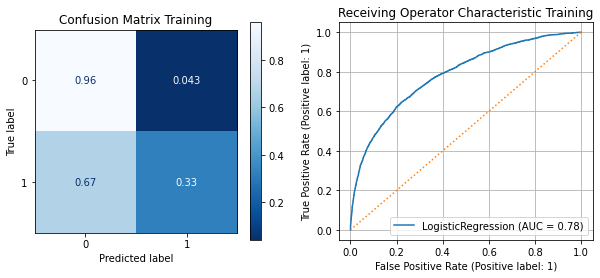

------------------------------------------------------------
Logistic Regression CLASSIFICATION REPORT TESTING 
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      4970
           1       0.70      0.32      0.44      1463

    accuracy                           0.81      6433
   macro avg       0.76      0.64      0.66      6433
weighted avg       0.80      0.81      0.79      6433



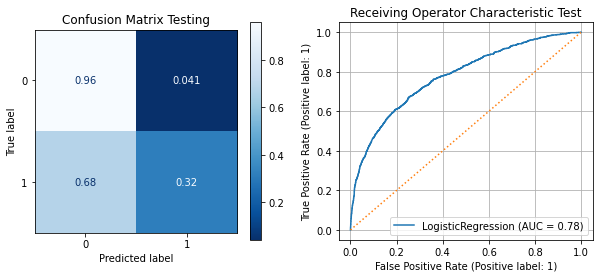

In [ ]:
# predict
y_pred = log_reg.predict(X_test_tf)
# classification report using function 
evaluate_classification(log_reg,X_train_tf, X_test_tf, y_train, y_test, label = "Logistic Regression")

In [ ]:
# create params_grid for LogisticRegression 
#params_grid = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
               #'penalty' : ['l2','l1','elasticnet'],
               #'random_state': [42]}

# create randomized search
#random_search = RandomizedSearchCV(log_reg, params_grid, cv=3, scoring=f1_scorer, n_iter=10, random_state=42)

# fit x_train and y_train to random search 
#random_lock = random_search.fit(X_train_tf, y_train)

# observe combination of best params 
#random_lock.best_params_


In [ ]:
# create params_grid for LogisticRegression 
params_grid = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
               'penalty' : ['l2','l1','elasticnet'],
               'random_state': [42]
               }


# create grid search 
grid = GridSearchCV(log_reg, params_grid, cv=3, scoring=f1_scorer) 

# fit x_train and y_train to grid 
gridlock = grid.fit(X_train_tf, y_train)

# observe combination of best params 
gridlock.best_params_

{'penalty': 'l2', 'random_state': 42, 'solver': 'sag'}

------------------------------------------------------------
Logistic Regression CLASSIFICATION REPORT TRAINING 
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.96      0.89     15008
           1       0.69      0.33      0.44      4290

    accuracy                           0.82     19298
   macro avg       0.76      0.64      0.67     19298
weighted avg       0.80      0.82      0.79     19298



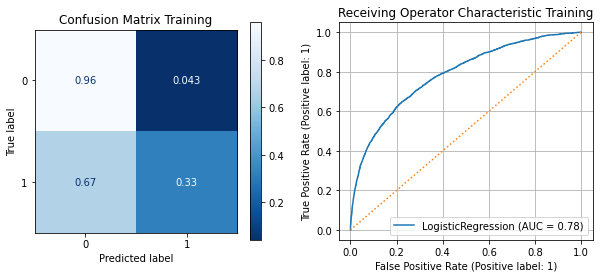

------------------------------------------------------------
Logistic Regression CLASSIFICATION REPORT TESTING 
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      4970
           1       0.70      0.32      0.44      1463

    accuracy                           0.81      6433
   macro avg       0.76      0.64      0.66      6433
weighted avg       0.80      0.81      0.79      6433



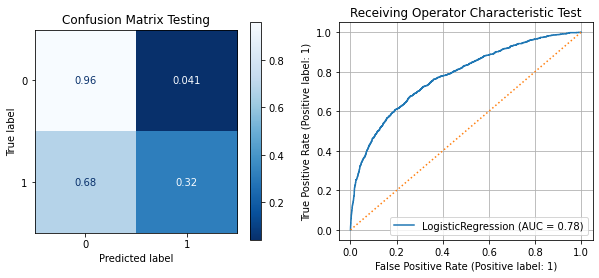

In [ ]:
# classification report using function 
evaluate_classification(gridlock.best_estimator_, X_train_tf, X_test_tf, y_train, y_test, 
                        label ="Logistic Regression")

### KNN Model

In [ ]:
# instantiate KneighborsClassifier 
knn_clf = KNeighborsClassifier()

In [ ]:
# fit the model 
knn_clf.fit(X_train_tf, y_train)

# predict
y_pred = knn_clf.predict(X_test_tf)

------------------------------------------------------------
KNN CLASSIFICATION REPORT TRAINING 
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.96      0.91     15008
           1       0.78      0.47      0.59      4290

    accuracy                           0.85     19298
   macro avg       0.82      0.72      0.75     19298
weighted avg       0.84      0.85      0.84     19298



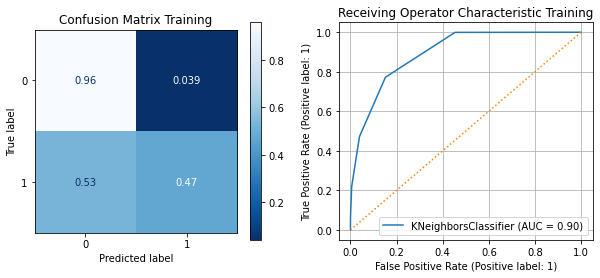

------------------------------------------------------------
KNN CLASSIFICATION REPORT TESTING 
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      4970
           1       0.58      0.31      0.41      1463

    accuracy                           0.79      6433
   macro avg       0.70      0.62      0.64      6433
weighted avg       0.77      0.79      0.77      6433



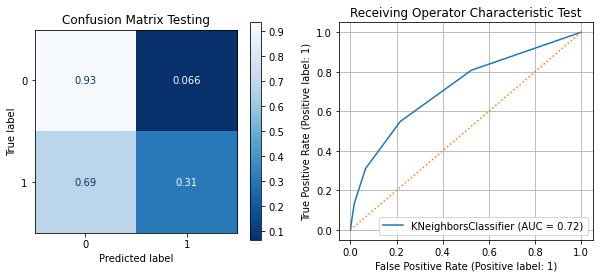

In [ ]:
# classification report using function 
evaluate_classification(knn_clf, X_train_tf, X_test_tf, y_train, y_test, label = 'KNN')

In [ ]:
# create params_grid for KNeighborsClassifier  
#params_grid = {'n_neighbors': randint(1, 50),
              #'weights': ['uniform', 'distance'],
              #'metric': ['euclidean', 'manhattan']}

# Perform a randomized search over the hyperparameters using cross-validation
#random_search = RandomizedSearchCV(knn_clf, params_grid, cv=3, n_iter=20, random_state=42)

# fit x_train and y_train to random_search 
#random_search.fit(X_train_tf, y_train)

# observe combination of best params 
#random_search.best_params_

In [ ]:
# create params_grid for KNeighborsClassifier
params_grid = {'n_neighbors': [3, 5, 7, 9, 11, 21],
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan']
               }

#  Perform a grid search over the hyperparameters using cross-validation
grid = GridSearchCV(knn_clf, params_grid, cv=3)

# fit x_train and y_train to grid 
grid.fit(X_train_tf, y_train)

# observe combination of best params 
grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}

------------------------------------------------------------
KNN CLASSIFICATION REPORT TRAINING 
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     15008
           1       0.99      0.94      0.97      4290

    accuracy                           0.99     19298
   macro avg       0.99      0.97      0.98     19298
weighted avg       0.99      0.99      0.98     19298



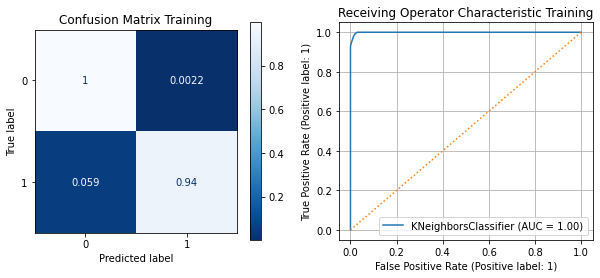

------------------------------------------------------------
KNN CLASSIFICATION REPORT TESTING 
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      4970
           1       0.69      0.33      0.45      1463

    accuracy                           0.81      6433
   macro avg       0.76      0.65      0.67      6433
weighted avg       0.80      0.81      0.79      6433



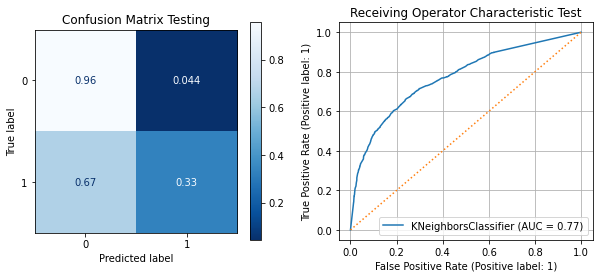

In [ ]:

# classification report using function
evaluate_classification(grid.best_estimator_, X_train_tf, X_test_tf, y_train, y_test, label='KNN')

### Bagged Trees

In [ ]:

#instantiate Bagging + DecisionTreeClassifier  
#bag_clf = BaggingClassifier(base_estimator=RandomForestClassifier())

In [ ]:
# fit the model  
#bag_clf.fit(X_train_tf, y_train)

# predict
#y_pred = bag_clf.predict(X_test_tf)
# classification report using function 
#evaluate_classification(bag_clf, X_train_tf, X_test_tf, y_train, y_test, label = 'Bagged Trees')

In [ ]:
#create params_grid for BaggingClassifier
#params_grid = {'bootstrap': [True, False],
               #'bootstrap_features': [True, False],    
               #'n_estimators': [5, 10, 15],
               #'max_samples' : [0.6, 0.8, 1.0],
               #'base_estimator__criterion': ['gini', 'entropy'],    
               #'base_estimator__max_depth': [1, 5, 10, 15, None]}

#Perform a grid search over the hyperparameters using cross-validationcreate 
#grid = GridSearchCV(bag_clf, params_grid, cv=3)

#fit x_train and y_train to grid 
#grid.fit(X_train_tf, y_train)

#observe combination of best params 
#grid.best_params_

In [ ]:
#classification report using function
#evaluate_classification(grid.best_estimator_, X_train_tf, X_test_tf, y_train, y_test, 
                        #label='Bagged Trees')

### Decision Tree

In [ ]:
# instantiate DecisionTreeClassifier 
tree_clf = DecisionTreeClassifier()

------------------------------------------------------------
Decision Tree CLASSIFICATION REPORT TRAINING 
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     15008
           1       0.99      0.94      0.97      4290

    accuracy                           0.99     19298
   macro avg       0.99      0.97      0.98     19298
weighted avg       0.99      0.99      0.98     19298



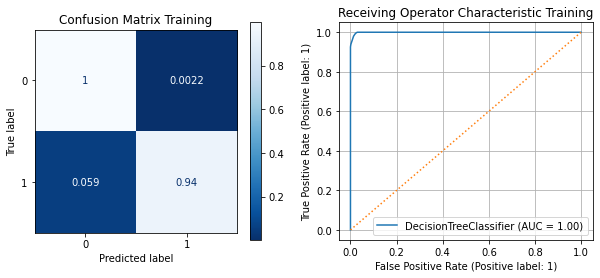

------------------------------------------------------------
Decision Tree CLASSIFICATION REPORT TESTING 
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      4970
           1       0.47      0.48      0.47      1463

    accuracy                           0.76      6433
   macro avg       0.66      0.66      0.66      6433
weighted avg       0.76      0.76      0.76      6433



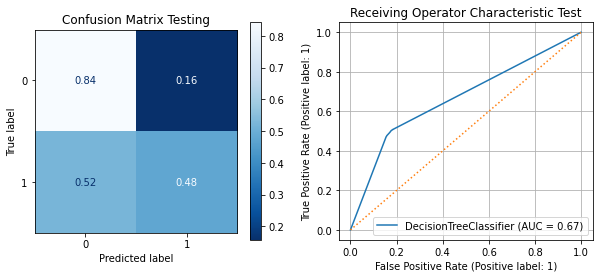

In [ ]:
# fit the model  
tree_clf.fit(X_train_tf, y_train)

# predict 
y_pred = tree_clf.predict(X_test_tf)
# classification report using function 
evaluate_classification(tree_clf, X_train_tf, X_test_tf, y_train, y_test, label = 'Decision Tree')

In [ ]:
#from sklearn import tree

In [ ]:
#fig, axes = plt.subplots(figsize = (5,5), dpi=230)
#tree.plot_tree(tree_clf,
               #filled = True);

In [ ]:
# create params_grid for DecisionTreeClassifier  
params_grid = {'criterion': ['gini', 'entropy'], 
              'max_depth': [2,4,6,8,10,12,20, None],
              'min_samples_leaf':[1, 5, 10, 20, 50, 100]}

#  Perform a grid search over the hyperparameters using cross-validation
grid = GridSearchCV(tree_clf, params_grid, cv=3)

# fit x_train and y_train to grid 
grid.fit(X_train_tf, y_train)

# observe combination of best params 
grid.best_params_

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 50}

------------------------------------------------------------
Decision Tree CLASSIFICATION REPORT TRAINING 
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.95      0.89     15008
           1       0.66      0.35      0.45      4290

    accuracy                           0.82     19298
   macro avg       0.75      0.65      0.67     19298
weighted avg       0.80      0.82      0.79     19298



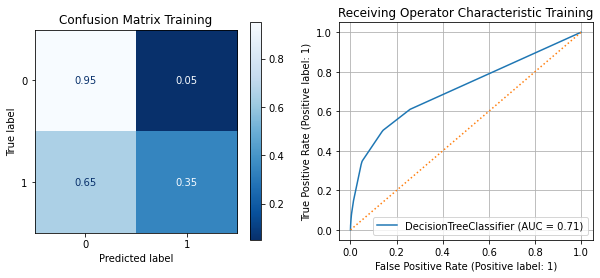

------------------------------------------------------------
Decision Tree CLASSIFICATION REPORT TESTING 
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4970
           1       0.67      0.34      0.45      1463

    accuracy                           0.81      6433
   macro avg       0.75      0.64      0.67      6433
weighted avg       0.79      0.81      0.79      6433



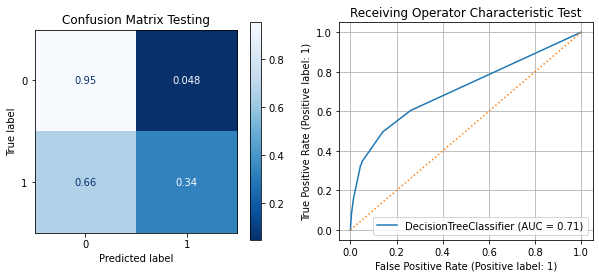

In [ ]:
# classification report using function
evaluate_classification(grid.best_estimator_, X_train_tf, X_test_tf, y_train, y_test, 
                        label='Decision Tree')


### Random Forests Model

In [ ]:
# instantiate RandomForestClassifier  
forest_clf = RandomForestClassifier()

------------------------------------------------------------
Random Forest CLASSIFICATION REPORT TRAINING 
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     15008
           1       0.98      0.95      0.97      4290

    accuracy                           0.99     19298
   macro avg       0.98      0.97      0.98     19298
weighted avg       0.99      0.99      0.99     19298



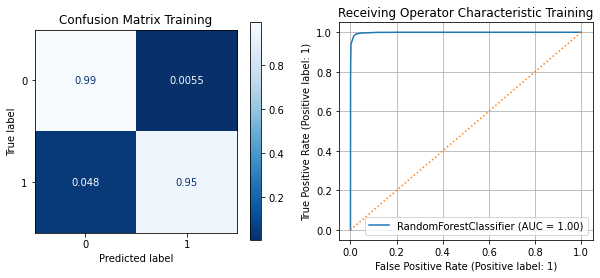

------------------------------------------------------------
Random Forest CLASSIFICATION REPORT TESTING 
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      4970
           1       0.71      0.44      0.55      1463

    accuracy                           0.83      6433
   macro avg       0.78      0.69      0.72      6433
weighted avg       0.82      0.83      0.82      6433



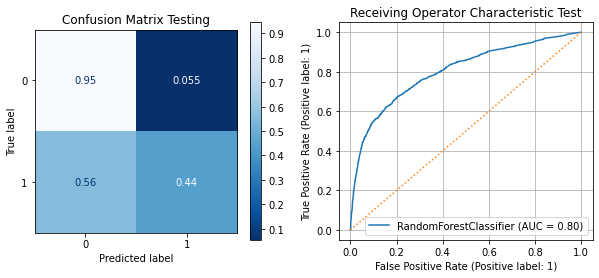

In [ ]:
# fit the model 
forest_clf.fit(X_train_tf, y_train)

# get prediction 
y_pred = forest_clf.predict(X_test_tf)
# classification report using function 
evaluate_classification(forest_clf,X_train_tf, X_test_tf, y_train, y_test, label = 'Random Forest')

In [ ]:
# create params_grid for RandomForestClassifier 
params_grid = {'criterion': ['gini', 'entropy'],   
              'bootstrap': [True, False],
              'max_depth': [10, 20, 30, 40, 50, None],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10]}

#  Perform a grid search over the hyperparameters using cross-validation
grid = GridSearchCV(forest_clf, params_grid, cv=3)

# fit x_train and y_train to grid 
grid.fit(X_train_tf, y_train)

# observe combination of best params 
grid.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5}

------------------------------------------------------------
Random Forest CLASSIFICATION REPORT TRAINING 
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     15008
           1       0.99      0.85      0.91      4290

    accuracy                           0.96     19298
   macro avg       0.97      0.92      0.94     19298
weighted avg       0.96      0.96      0.96     19298



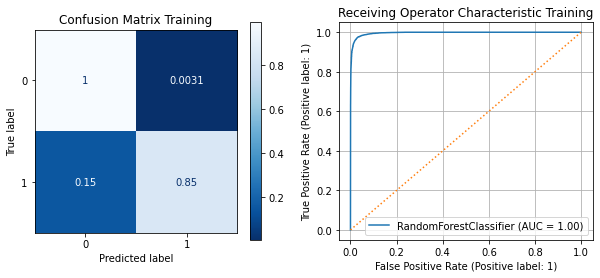

------------------------------------------------------------
Random Forest CLASSIFICATION REPORT TESTING 
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      4970
           1       0.74      0.42      0.53      1463

    accuracy                           0.83      6433
   macro avg       0.79      0.69      0.72      6433
weighted avg       0.82      0.83      0.82      6433



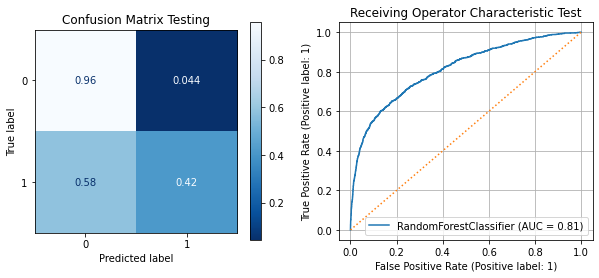

In [ ]:
# classification report using function
evaluate_classification(grid.best_estimator_, X_train_tf, X_test_tf, y_train, y_test, 
                        label='Random Forest')

In [ ]:
#if hasattr(forest_clf, "feature_importances_"):
    # print the feature importances
    #print(forest_clf.feature_importances_)
#else:
    #print("Error: feature_importances_ attribute not found")

In [ ]:
best_clf = grid.best_params_

In [ ]:
# accessing categorical columns from pipeline then converting to dataframe
slice_pipe = preprocessing.named_transformers_['cat']
cat_features = slice_pipe.named_steps['encoder'].get_feature_names(cat_cols)
X_train_tf = pd.DataFrame(X_train_tf,columns=[*num_cols, *cat_features])
X_train_tf

,traffic_control_device_NO CONTROLS,traffic_control_device_NSIGNAL/SIGN,traffic_control_device_SIGNAL/SIGN,device_condition_FUNCTIONING IMPROPERLY,device_condition_FUNCTIONING PROPERLY,device_condition_MISSING,device_condition_NO CONTROLS,device_condition_NOT FUNCTIONING,device_condition_OTHER,device_condition_UNKNOWN,...,driver_vision_BUILDINGS,driver_vision_EMBANKMENT,driver_vision_HILLCREST,driver_vision_MOVING VEHICLES,driver_vision_NOT OBSCURED,driver_vision_OTHER,driver_vision_PARKED VEHICLES,"driver_vision_TREES, PLANTS",driver_vision_UNKNOWN,driver_vision_WINDSHIELD (WATER/ICE)
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19293,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19294,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
19295,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19296,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# plot feature importances
##importance = pd.Series(best_clf.feature_importances_ ,index=X_train_tf.columns)
#importance.sort_values().tail(15).plot(kind='barh', figsize=(10,10), title='Feature Importance')
#plt.show()

In [ ]:
print(len(X_train_tf))

19298


### Model Result

 
| MODEL               | ACCURACY |
|---------------------|----------|
| Logistic regression | 0.81     |
| KNearest Neighbors  | 0.81     |       
| Decision Tree       | 0.76     |
| Random Forest       | 0.83            |          |       




#### Obesrvation:
*  Random Forest Classifier returned an accuracy rate of 83%
 In this report, the precision for class 0 is 0.85, which means that out of all the predictions the model made for class 0, 85% were correct. The precision for class 1 is 0.74, which means that out of all the predictions the model made for class 1, 74% were correct.

* Recall is the ratio of true positive predictions to the total number of actual positive cases in the dataset. In this report, the recall for class 0 is 0.96, which means that out of all the actual cases of class 0 in the dataset, 96% were correctly identified by the model. The recall for class 1 is 0.42, which means that out of all the actual cases of class 1 in the dataset, only 42% were correctly identified by the model.

* F1-score: F1-score is the harmonic mean of precision and recall, and is a measure of the overall accuracy of the model. In this report, the F1-score for class 0 is 0.90, while the F1-score for class 1 is 0.53.
* The overall accuracy and weighted average metrics are higher for the Random Forest model, indicating better performance overall
 


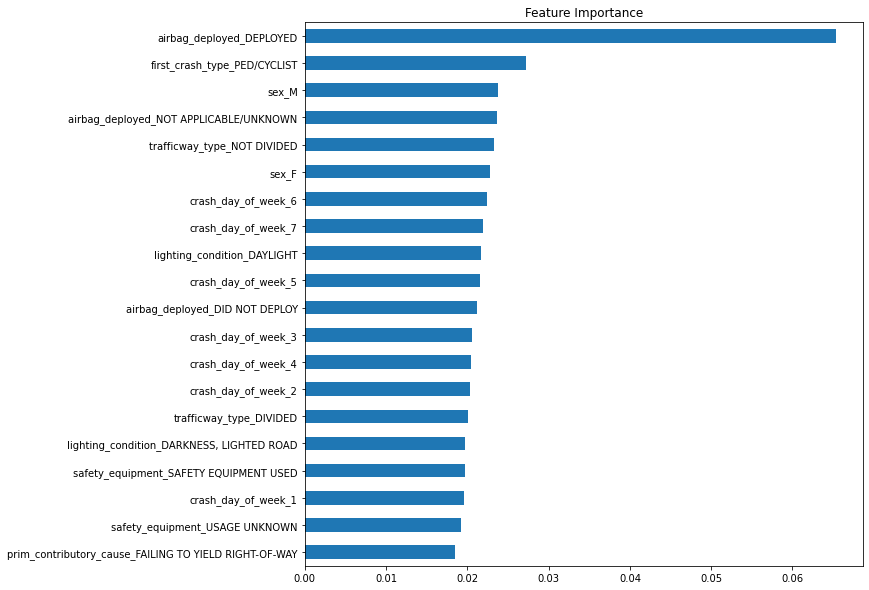

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt



# fit a random forest classifier to training data

best_clf = RandomForestClassifier()
best_clf.fit(X_train_tf, y_train)

# plot feature importances
importance = pd.Series(best_clf.feature_importances_ ,index=X_train_tf.columns)
importance.sort_values().tail(20).plot(kind='barh', figsize=(10,10), title='Feature Importance')
plt.show()

### Observations:

Airbag deployed, Ped/Cyclist, Male, and Airbag deployed have the highest coefs with injuries/accidents

In [ ]:
!pip install shap
import shap 
shap.initjs()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 22.5 MB/s eta 0:00:00


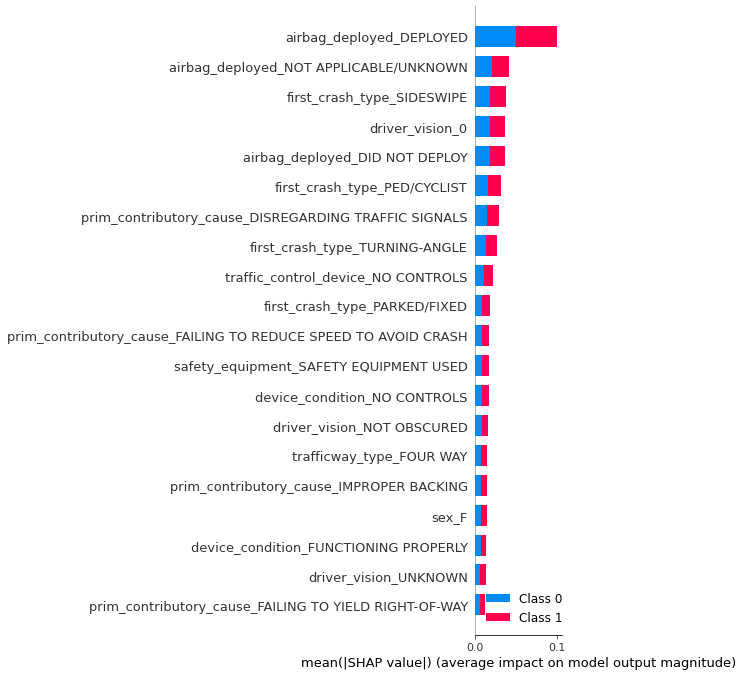

In [ ]:
X_shap = shap.sample(X_train_tf)
explainer = shap.TreeExplainer(best_clf)
shap_values = explainer.shap_values(X_shap, check_additivity=False)
shap.summary_plot(shap_values, X_shap, plot_type="bar")

* The primary cause of accident with crashes disregarding the traffic signal and first crash type is sidewipe crash



### Recommendations
* Increase enforcement of traffic laws and regulations, particularly with respect to distracted driving and failure to maintain a proper lane.
* Installation of physical barriers between opposing lanes of traffic, wider lanes, and better marking of lanes and road edges.
* Encourage the use of advanced driver assistance systems (ADAS) for instance blind spot detection, lane departure warning, and automatic emergency braking.

### Next Steps
To  further analysis to better understand the factors that contribute to sidewipe crashes; 
This could involve analyzing
* crash data, conducting simulated driving studies, and 
* analysis driver behavior and roadway design.
* location of the crash